# Data Analysis Assignment 3

Find the attached file of World population, 

Find out missing or invalid values, handle them using one of the known techniques [mean, mode, forward backward filling]

Describe the top 10 countries by populations and visualize in both pie and bar plots. 

Describe the last 10 countries by fertilization rate and visaulize them. 

In [35]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df = pd.read_csv('world_population.csv')

In [37]:
df

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2,34,26.0
...,...,...,...,...,...,...,...,...,...,...
196,Vietnam,97338579,0.91,876473,314,310070,-80000,2.1,32,38.0
197,Western Sahara,597339,2.55,14876,2,266000,5582,2.4,28,87.0
198,Yemen,29825964,2.28,664042,56,527970,-30000,3.8,20,38.0
199,Zambia,18383955,2.93,522925,25,743390,-8000,4.7,18,45.0


In [38]:
# Check the shape of Dataset
df.shape

(201, 10)

In [39]:
# Check the column names:
df.columns

Index(['Country/Other', 'Population (2020)', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %'],
      dtype='object')

In [40]:
# changed the column names to a more readible way.
df.columns =['country_other', 'population_2020', 'yearly_change', 'net_change',
       'density', 'land_area', 'migrants', 'fert_rate',
       'Med_age', 'urban_pop']

In [41]:
df

,country_other,population_2020,yearly_change,net_change,density,land_area,migrants,fert_rate,Med_age,urban_pop
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2,34,26.0
...,...,...,...,...,...,...,...,...,...,...
196,Vietnam,97338579,0.91,876473,314,310070,-80000,2.1,32,38.0
197,Western Sahara,597339,2.55,14876,2,266000,5582,2.4,28,87.0
198,Yemen,29825964,2.28,664042,56,527970,-30000,3.8,20,38.0
199,Zambia,18383955,2.93,522925,25,743390,-8000,4.7,18,45.0


## 1- Find out missing or invalid values, handle them using one of the known techniques [mean, mode, forward backward filling]

In [42]:
# How much of your data is missing?
df.isnull().sum().sort_values(ascending=False)

urban_pop          7
Med_age            0
fert_rate          0
migrants           0
land_area          0
density            0
net_change         0
yearly_change      0
population_2020    0
country_other      0
dtype: int64

In [43]:
# It seems only urban_pop  feature has missing values.
# Check Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_other    201 non-null    object 
 1   population_2020  201 non-null    int64  
 2   yearly_change    201 non-null    float64
 3   net_change       201 non-null    object 
 4   density          201 non-null    int64  
 5   land_area        201 non-null    object 
 6   migrants         201 non-null    int64  
 7   fert_rate        201 non-null    object 
 8   Med_age          201 non-null    int64  
 9   urban_pop        194 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 15.8+ KB


In [44]:
# urban_pop is Float64

In [45]:
# Impute missing values using SimpleImputer in sklearn.preprocessing
# I choose to impute with median.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# imp = Imputer(missing_values='NaN', strategy='median', axis=0)
df['urban_pop'] = imputer.fit_transform(df['urban_pop'].to_numpy().reshape(-1,1))
df['urban_pop']

0      25.0
1      63.0
2      73.0
3      67.0
4      26.0
       ... 
196    38.0
197    87.0
198    38.0
199    45.0
200    38.0
Name: urban_pop, Length: 201, dtype: float64

In [46]:
# Checked.. There is no missing value now. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_other    201 non-null    object 
 1   population_2020  201 non-null    int64  
 2   yearly_change    201 non-null    float64
 3   net_change       201 non-null    object 
 4   density          201 non-null    int64  
 5   land_area        201 non-null    object 
 6   migrants         201 non-null    int64  
 7   fert_rate        201 non-null    object 
 8   Med_age          201 non-null    int64  
 9   urban_pop        201 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 15.8+ KB


## 2 - Describe the top 10 countries by populations and visualize in both pie and bar plots.

In [51]:
# 1- We are sorting the dataset by populations Descending.
# 2- Reset index.
# 3- Get the first 10
top_ten_by_pop = df.sort_values('population_2020', ascending=False).reset_index(drop=True).head(10)
top_ten_by_pop

,country_other,population_2020,yearly_change,net_change,density,land_area,migrants,fert_rate,Med_age,urban_pop
0,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0
1,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0
2,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0
3,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0
4,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0
5,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0
6,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0
7,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0
8,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0
9,Mexico,128932753,1.06,1357224,66,1943950,-60000,2.1,29,84.0


In [52]:
# Describe Top ten country by population 
top_ten_by_pop.describe()

,population_2020,yearly_change,density,migrants,Med_age,urban_pop
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.503002e+08,1.045000,268.200000,-54445.900000,30.500000,60.700000
std,5.092752e+08,0.747221,377.450747,412159.180568,6.964194,20.688429
min,1.289328e+08,0.040000,9.000000,-532687.000000,18.000000,35.000000
25%,1.750519e+08,0.622500,43.500000,-319644.000000,28.000000,42.250000
50%,2.167259e+08,1.000000,152.000000,-79477.500000,29.500000,58.500000
75%,3.166329e+08,1.067500,271.750000,900.000000,36.750000,80.750000
max,1.439324e+09,2.580000,1265.000000,954806.000000,40.000000,88.000000


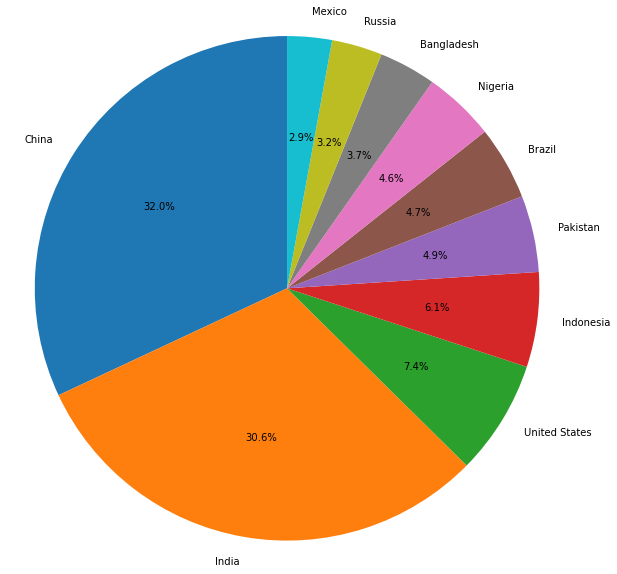

In [61]:
# Pie chart, 
labels = top_ten_by_pop['country_other']
sizes = top_ten_by_pop['population_2020']

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

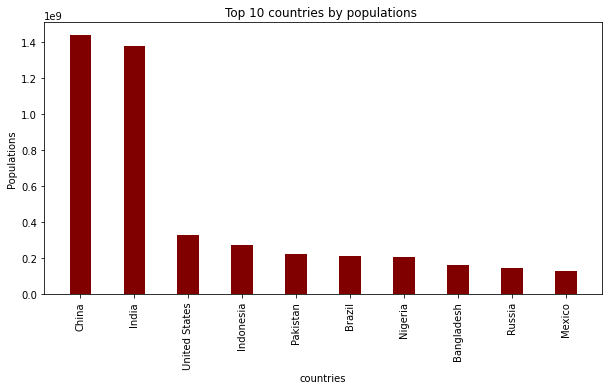

In [77]:
# Bar Chart
c_name = top_ten_by_pop['country_other']
c_pop = top_ten_by_pop['population_2020']

fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(c_name, c_pop, color ='maroon',
        width = 0.4)
plt.xticks(rotation=90)

plt.xlabel("countries")
plt.ylabel("Populations")
plt.title("Top 10 countries by populations ")
plt.show()

## Describe the last 10 countries by fertilization rate and visaulize them. 

In [78]:
# 1- We are sorting the dataset by fertilization rate ascending.
# 2- Reset index.
# 3- Get the first 10
last_ten_by_fert = df.sort_values('fert_rate').reset_index(drop=True).head(10)
last_ten_by_fert

,country_other,population_2020,yearly_change,net_change,density,land_area,migrants,fert_rate,Med_age,urban_pop
0,South Korea,51269185,0.09,43877,527,97230,11731,1.1,44,82.0
1,Taiwan,23816775,0.18,42899,673,35410,30001,1.2,42,79.0
2,Singapore,5850342,0.79,46005,8358,700,27028,1.2,42,60.0
3,Macao,649335,1.39,8890,21645,30,5000,1.2,39,60.0
4,Puerto Rico,2860853,-2.47,-72555,323,8870,-97986,1.2,44,60.0
5,Italy,60461826,-0.15,-88249,206,294140,148943,1.3,47,69.0
6,Hong Kong,7496981,0.82,60827,7140,NAN,29308,1.3,45,60.0
7,Portugal,10196709,-0.29,-29478,111,91590,-6000,1.3,46,66.0
8,Spain,46754778,0.04,18002,94,498800,40000,1.3,45,80.0
9,Bosnia and Herzegovina,3280819,-0.61,-20181,64,51000,-21585,1.3,43,52.0


In [79]:
# Describe Last ten country by fertilization 
last_ten_by_fert.describe()

,population_2020,yearly_change,density,migrants,Med_age,urban_pop
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2.126376e+07,-0.021000,3914.100000,16644.000000,43.700000,66.800000
std,2.292429e+07,1.045939,6968.521897,61254.574723,2.311805,10.347302
min,6.493350e+05,-2.470000,64.000000,-97986.000000,39.000000,52.000000
25%,3.923200e+06,-0.255000,134.750000,-3250.000000,42.250000,60.000000
50%,8.846845e+06,0.065000,425.000000,19379.500000,44.000000,63.000000
75%,4.102028e+07,0.637500,5523.250000,29827.750000,45.000000,76.500000
max,6.046183e+07,1.390000,21645.000000,148943.000000,47.000000,82.000000


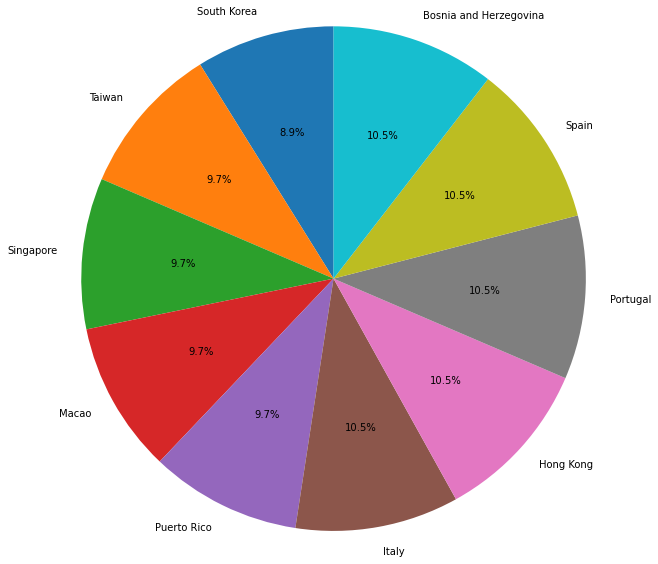

In [84]:
# Pie chart, 
labels = last_ten_by_fert['country_other']
sizes = last_ten_by_fert['fert_rate']

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

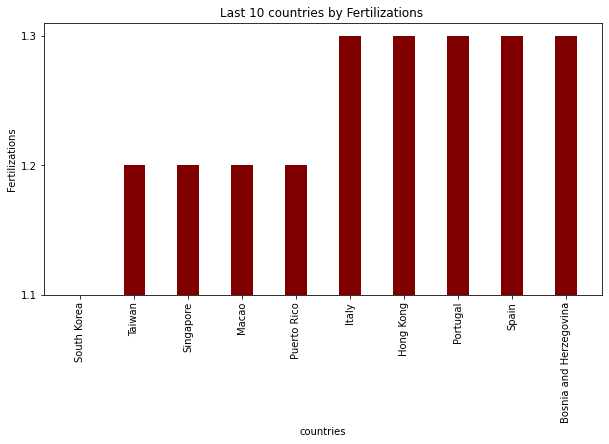

In [85]:
# Bar Chart
c_name = last_ten_by_fert['country_other']
c_pop = last_ten_by_fert['fert_rate']

fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(c_name, c_pop, color ='maroon',
        width = 0.4)
plt.xticks(rotation=90)

plt.xlabel("countries")
plt.ylabel("Fertilizations")
plt.title("Last 10 countries by Fertilizations ")
plt.show()